Aung Thura Hein - 6726135

In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import uniform

In [2]:
swedish_motor_insurance = pd.read_csv('swedish_motor_insurance.csv')
swedish_motor_insurance.head()

,n_claims,total_payment_sek
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4


In [3]:
print(swedish_motor_insurance.mean())

n_claims             22.904762
total_payment_sek    98.187302
dtype: float64


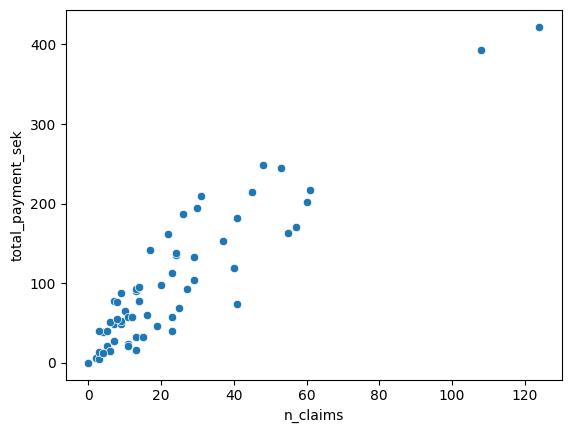

In [4]:
sns.scatterplot(x = "n_claims", y = "total_payment_sek", data = swedish_motor_insurance) 
plt.show()


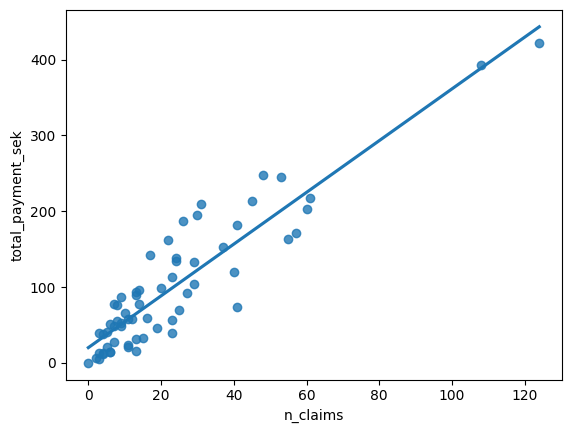

In [5]:
sns.regplot(x = "n_claims", y = "total_payment_sek", data = swedish_motor_insurance, ci = None)
plt.show()

In [6]:
taiwan_real_estate = pd.read_csv('taiwan_real_estate2.csv')
taiwan_real_estate.head()

,dist_to_mrt_m,n_convenience,house_age_years,price_twd_msq
0,84.87882,10,30 to 45,11.467474
1,306.59470,9,15 to 30,12.768533
2,561.98450,5,0 to 15,14.311649
3,561.98450,5,0 to 15,16.580938
4,390.56840,5,0 to 15,13.040847


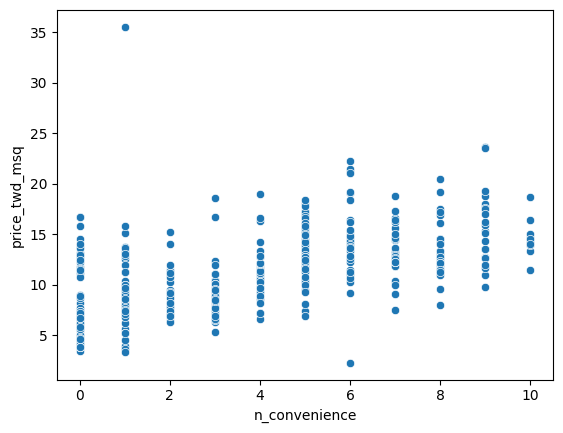

In [8]:
sns.scatterplot(x = "n_convenience", y = "price_twd_msq", data = taiwan_real_estate)
plt.show()

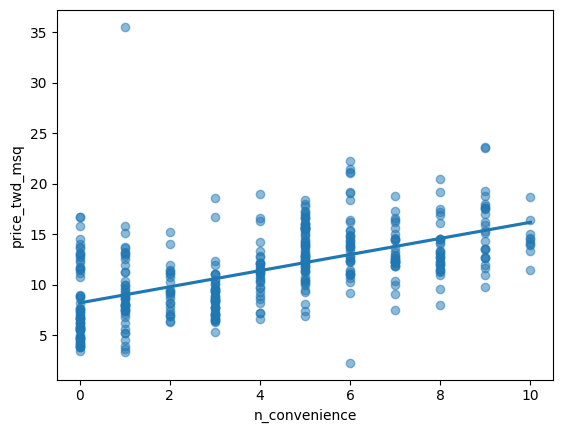

In [9]:
sns.regplot(x = "n_convenience", y = "price_twd_msq", data = taiwan_real_estate, ci = None, scatter_kws = {'alpha':0.5})
plt.show()

In [12]:
from statsmodels.formula.api import ols
mdl_payment_vs_claims = ols('total_payment_sek ~ n_claims', data = swedish_motor_insurance)
mdl_payment_vs_claims = mdl_payment_vs_claims.fit()
print(mdl_payment_vs_claims.params)


Intercept    19.994486
n_claims      3.413824
dtype: float64


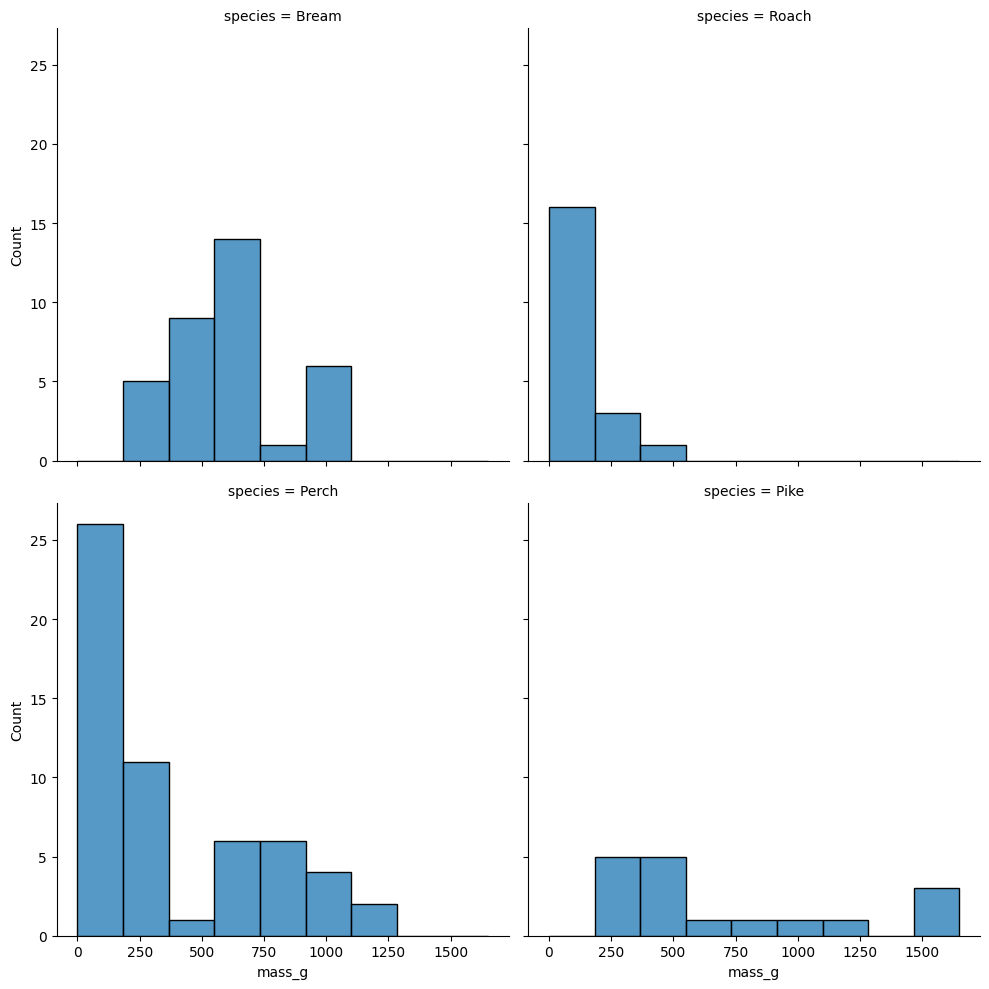

In [14]:
fish = pd.read_csv("fish.csv")
sns.displot(data = fish, x = 'mass_g', col = 'species', col_wrap = 2, bins = 9)
plt.show()

In [16]:
summary_stats = fish.groupby("species")["mass_g"].mean()
print(summary_stats)

species
Bream    617.828571
Perch    382.239286
Pike     718.705882
Roach    152.050000
Name: mass_g, dtype: float64


In [17]:
mdl_mass_vs_species = ols("mass_g ~ species", data = fish).fit()
print(mdl_mass_vs_species.params)

Intercept           617.828571
species[T.Perch]   -235.589286
species[T.Pike]     100.877311
species[T.Roach]   -465.778571
dtype: float64


In [18]:
mdl_mass_vs_species = ols("mass_g ~ species + 0", data = fish).fit()
print(mdl_mass_vs_species.params)

species[Bream]    617.828571
species[Perch]    382.239286
species[Pike]     718.705882
species[Roach]    152.050000
dtype: float64


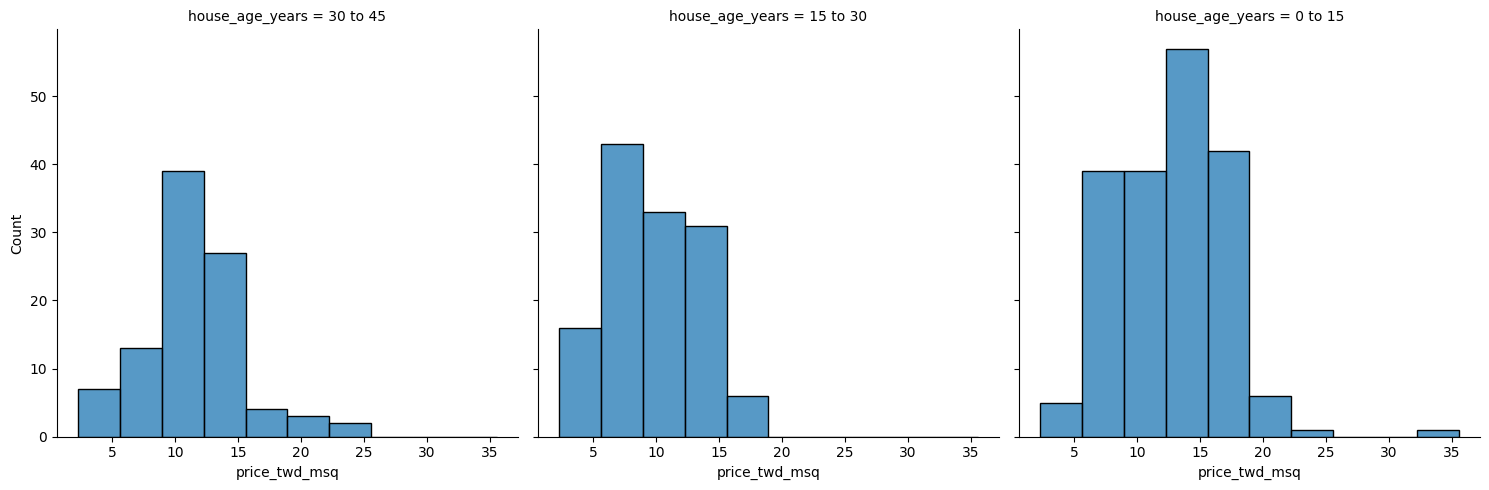

In [19]:
sns.displot(data=taiwan_real_estate,x = "price_twd_msq", col = "house_age_years" , bins=10)
plt.show()

In [20]:
mdl_price_vs_age = ols("price_twd_msq ~ house_age_years", data = taiwan_real_estate).fit()
print(mdl_price_vs_age.params)

Intercept                      12.637471
house_age_years[T.15 to 30]    -2.760728
house_age_years[T.30 to 45]    -1.244207
dtype: float64


In [21]:
mdl_price_vs_age0 = ols("price_twd_msq ~ house_age_years + 0", data = taiwan_real_estate).fit()
print(mdl_price_vs_age0.params)

house_age_years[0 to 15]     12.637471
house_age_years[15 to 30]     9.876743
house_age_years[30 to 45]    11.393264
dtype: float64


In [23]:
bream = fish[fish["species"] == "Bream"]
print(bream.head())

  species  mass_g  length_cm
0   Bream   242.0       23.2
1   Bream   290.0       24.0
2   Bream   340.0       23.9
3   Bream   363.0       26.3
4   Bream   430.0       26.5


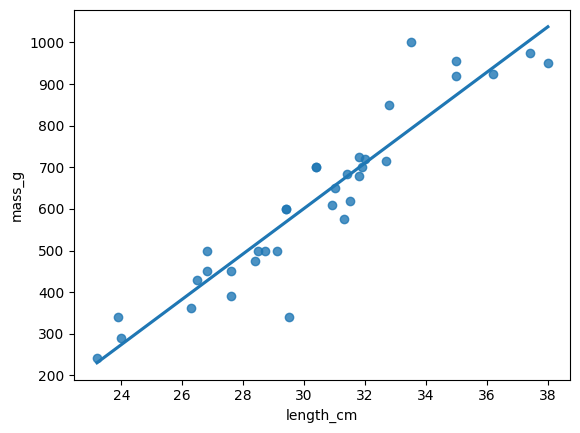

In [24]:
sns.regplot(x = "length_cm" , y = "mass_g", data = bream, ci = None)
plt.show()


In [25]:
mdl_mass_vs_length = ols("mass_g ~ length_cm", data = bream).fit()
print(mdl_mass_vs_length.params)

Intercept   -1035.347565
length_cm      54.549981
dtype: float64


In [29]:
explanatory_data = pd.DataFrame({"length_cm": np.arange(20,41)})
print(explanatory_data)

    length_cm
0          20
1          21
2          22
3          23
4          24
5          25
6          26
7          27
8          28
9          29
10         30
11         31
12         32
13         33
14         34
15         35
16         36
17         37
18         38
19         39
20         40


In [30]:
print(mdl_mass_vs_length.predict(explanatory_data))

0       55.652054
1      110.202035
2      164.752015
3      219.301996
4      273.851977
5      328.401958
6      382.951939
7      437.501920
8      492.051901
9      546.601882
10     601.151863
11     655.701844
12     710.251825
13     764.801806
14     819.351787
15     873.901768
16     928.451749
17     983.001730
18    1037.551710
19    1092.101691
20    1146.651672
dtype: float64


In [31]:
explanatory_data = pd.DataFrame({'length_cm':np.arange(20,41)})
prediction_data = explanatory_data.assign(mass_g = mdl_mass_vs_length.predict(explanatory_data))
print(prediction_data)

    length_cm       mass_g
0          20    55.652054
1          21   110.202035
2          22   164.752015
3          23   219.301996
4          24   273.851977
5          25   328.401958
6          26   382.951939
7          27   437.501920
8          28   492.051901
9          29   546.601882
10         30   601.151863
11         31   655.701844
12         32   710.251825
13         33   764.801806
14         34   819.351787
15         35   873.901768
16         36   928.451749
17         37   983.001730
18         38  1037.551710
19         39  1092.101691
20         40  1146.651672


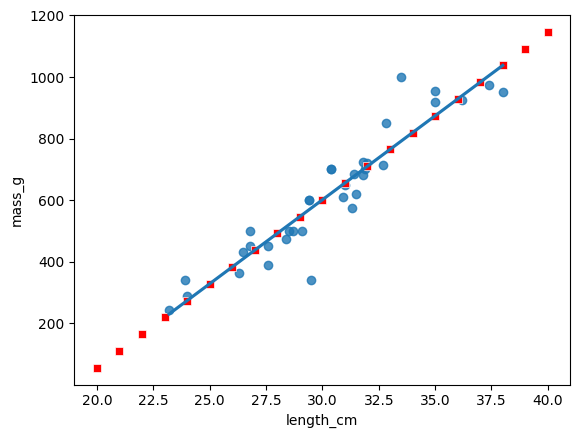

In [33]:
fig = plt.figure
sns.regplot(x='length_cm', y='mass_g', ci=None, data=bream)
sns.scatterplot(x='length_cm', y='mass_g',data=prediction_data, color='red', marker='s')
plt.show()

In [35]:
explanatory_data = pd.DataFrame({"n_convenience": np.arange(0, 11)})

mdl_price_vs_conv = ols("price_twd_msq ~ n_convenience", data=taiwan_real_estate).fit()
price_twd_msq = mdl_price_vs_conv.predict(explanatory_data)

prediction_data = explanatory_data.assign(price_twd_msq = price_twd_msq)
print(prediction_data)


    n_convenience  price_twd_msq
0               0       8.224237
1               1       9.022317
2               2       9.820397
3               3      10.618477
4               4      11.416556
5               5      12.214636
6               6      13.012716
7               7      13.810795
8               8      14.608875
9               9      15.406955
10             10      16.205035


In [36]:
print(mdl_mass_vs_length.fittedvalues)

0      230.211993
1      273.851977
2      268.396979
3      399.316934
4      410.226930
5      426.591924
6      426.591924
7      470.231909
8      470.231909
9      519.326892
10     513.871893
11     530.236888
12     552.056880
13     573.876873
14     568.421874
15     568.421874
16     622.971855
17     622.971855
18     650.246846
19     655.701844
20     672.066838
21     677.521836
22     682.976834
23     699.341829
24     704.796827
25     699.341829
26     710.251825
27     748.436811
28     753.891810
29     792.076796
30     873.901768
31     873.901768
32     939.361745
33    1004.821722
34    1037.551710
dtype: float64


In [37]:
print(mdl_mass_vs_length.resid)

0      11.788007
1      16.148023
2      71.603021
3     -36.316934
4      19.773070
5      23.408076
6      73.408076
7     -80.231909
8     -20.231909
9     -19.326892
10    -38.871893
11    -30.236888
12    -52.056880
13   -233.876873
14     31.578126
15     31.578126
16     77.028145
17     77.028145
18    -40.246846
19     -5.701844
20    -97.066838
21      7.478164
22    -62.976834
23    -19.341829
24     -4.796827
25     25.658171
26      9.748175
27    -34.436811
28     96.108190
29    207.923204
30     46.098232
31     81.098232
32    -14.361745
33    -29.821722
34    -87.551710
dtype: float64


In [39]:
coeffs = mdl_price_vs_conv.params
intercept = coeffs.iloc[0]  
slope = coeffs.iloc[1]
price_twd_msq = intercept + slope * explanatory_data
print(price_twd_msq)

    n_convenience
0        8.224237
1        9.022317
2        9.820397
3       10.618477
4       11.416556
5       12.214636
6       13.012716
7       13.810795
8       14.608875
9       15.406955
10      16.205035


In [40]:
price_twd_msq = mdl_price_vs_conv.predict(explanatory_data)
prediction_data = explanatory_data.assign(price_twd_msq = price_twd_msq)
print(prediction_data)

    n_convenience  price_twd_msq
0               0       8.224237
1               1       9.022317
2               2       9.820397
3               3      10.618477
4               4      11.416556
5               5      12.214636
6               6      13.012716
7               7      13.810795
8               8      14.608875
9               9      15.406955
10             10      16.205035


In [42]:
perch = fish[fish["species"] == "Perch"]
print(perch.head())

   species  mass_g  length_cm
55   Perch     5.9        7.5
56   Perch    32.0       12.5
57   Perch    40.0       13.8
58   Perch    51.5       15.0
59   Perch    70.0       15.7


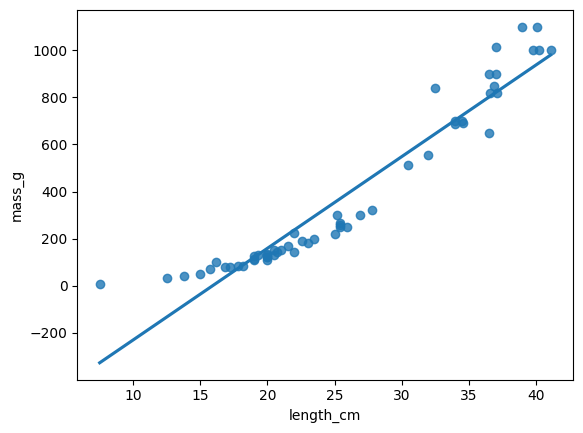

In [43]:
sns.regplot(x = "length_cm", y = "mass_g", data = perch, ci = None)
plt.show()

In [46]:
perch.loc[:, 'length_cm_cubed'] = perch['length_cm'] ** 3
mdl_perch = ols('mass_g ~ length_cm_cubed', data=perch).fit()
mdl_perch.params

Intercept         -0.117478
length_cm_cubed    0.016796
dtype: float64

In [47]:
explanatory_data = pd.DataFrame({'length_cm_cubed':np.arange(10,41,5)**3, 'length_cm':np.arange(10,41,5)})
prediction_data = explanatory_data.assign(mass_g = mdl_perch.predict(explanatory_data))
print(prediction_data)

   length_cm_cubed  length_cm       mass_g
0             1000         10    16.678135
1             3375         15    56.567717
2             8000         20   134.247429
3            15625         25   262.313982
4            27000         30   453.364084
5            42875         35   719.994447
6            64000         40  1074.801781


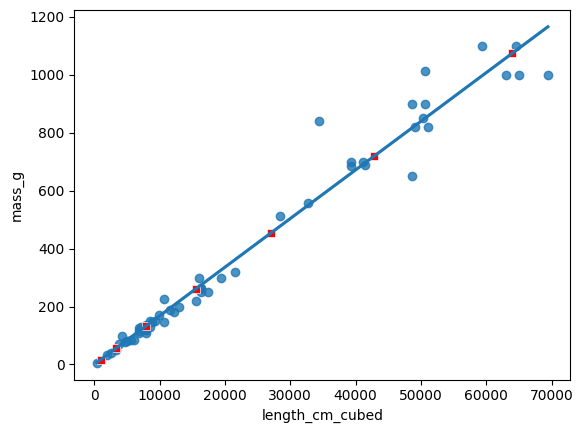

In [49]:
fig = plt.figure()
sns.regplot(x = "length_cm_cubed", y = "mass_g",data = perch,ci=None)
sns.scatterplot(data = prediction_data, x = "length_cm_cubed", y = "mass_g", color = "red", marker = "s")
plt.show()

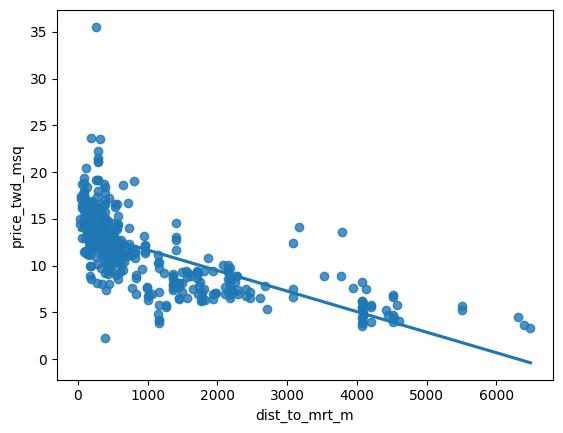

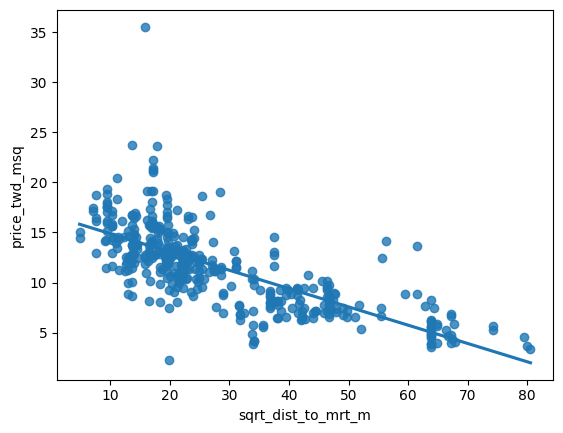

In [50]:
sns.regplot(x="dist_to_mrt_m", y="price_twd_msq", data=taiwan_real_estate, ci=None)
plt.show()

taiwan_real_estate["sqrt_dist_to_mrt_m"] = np.sqrt(taiwan_real_estate["dist_to_mrt_m"])
plt.figure()

sns.regplot(x="sqrt_dist_to_mrt_m", y="price_twd_msq", data=taiwan_real_estate, ci=None)
plt.show()

In [51]:
mdl_price_vs_dist = ols("price_twd_msq ~ sqrt_dist_to_mrt_m", data=taiwan_real_estate).fit()
print(mdl_price_vs_dist.params)

explanatory_data = pd.DataFrame({"sqrt_dist_to_mrt_m": np.sqrt(np.arange(0, 81, 10) ** 2),"dist_to_mrt_m": np.arange(0, 81, 10) ** 2})
prediction_data = explanatory_data.assign(price_twd_msq = mdl_price_vs_dist.predict(explanatory_data))
print(prediction_data)

Intercept             16.709799
sqrt_dist_to_mrt_m    -0.182843
dtype: float64
   sqrt_dist_to_mrt_m  dist_to_mrt_m  price_twd_msq
0                 0.0              0      16.709799
1                10.0            100      14.881370
2                20.0            400      13.052942
3                30.0            900      11.224513
4                40.0           1600       9.396085
5                50.0           2500       7.567656
6                60.0           3600       5.739227
7                70.0           4900       3.910799
8                80.0           6400       2.082370


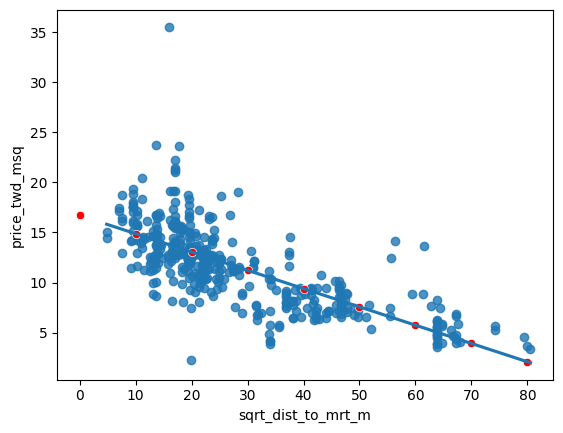

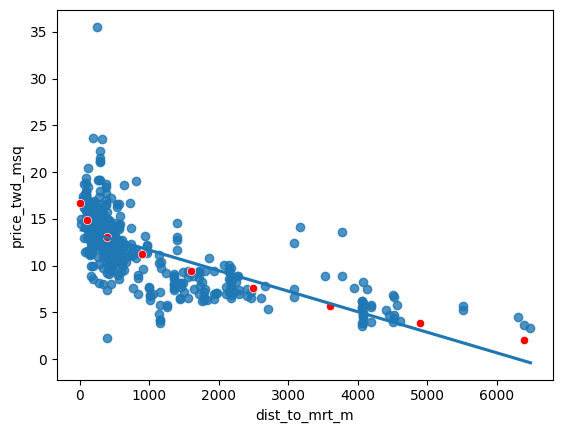

In [52]:
fig = plt.figure()
sns.regplot(x = "sqrt_dist_to_mrt_m", y = "price_twd_msq", data = taiwan_real_estate, ci = None)

sns.scatterplot(x = "sqrt_dist_to_mrt_m", y = "price_twd_msq", data = prediction_data, color = "red")
plt.show()
fig = plt.figure()

sns.regplot(x = "dist_to_mrt_m", y = "price_twd_msq", data = taiwan_real_estate, ci = None)

sns.scatterplot(x = "dist_to_mrt_m", y = "price_twd_msq", data = prediction_data, color = "red")
plt.show()

In [53]:
mbl_beam = ols("mass_g ~ length_cm", data = bream).fit()
print(mbl_beam.summary())

                            OLS Regression Results                            
Dep. Variable:                 mass_g   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     237.6
Date:                Wed, 28 Jan 2026   Prob (F-statistic):           1.22e-16
Time:                        10:34:23   Log-Likelihood:                -199.35
No. Observations:                  35   AIC:                             402.7
Df Residuals:                      33   BIC:                             405.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1035.3476    107.973     -9.589      0.0

In [54]:
print(mbl_beam.rsquared)

0.8780627095147174


In [56]:
mse = mbl_beam.mse_resid
print("mse: ", mse)

mse:  5498.55508497352


In [57]:
rse = np.sqrt(mse)
print("rse: ", rse) 

rse:  74.15224261594197


Aung Thura Hein - 6726135